In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import config_paths, explore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay

In [2]:
bronze_dir = config_paths["bronze_dir"]

In [3]:
df_train = pd.read_csv(f"{bronze_dir}/AMZN_train.csv")
df_test = pd.read_csv(f"{bronze_dir}/AMZN_test.csv")
df_val = pd.read_csv(f"{bronze_dir}/AMZN_val.csv")

#### Exploratory analysis of train dataset

In [4]:
explore(df_train)

--- Exploratory Data Analysis ---
---------------------------------
Head of DataFrame:
          Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
---------------------------------
Shape of DataFrame:
 (4781, 7)
---------------------------------
Columns in DataFrame:
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
---------------------------------
Data types of columns:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
---------------------------------


In [5]:
df_train["Date"].describe()

count           4781
unique          4781
top       2016-05-13
freq               1
Name: Date, dtype: object

In [6]:
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

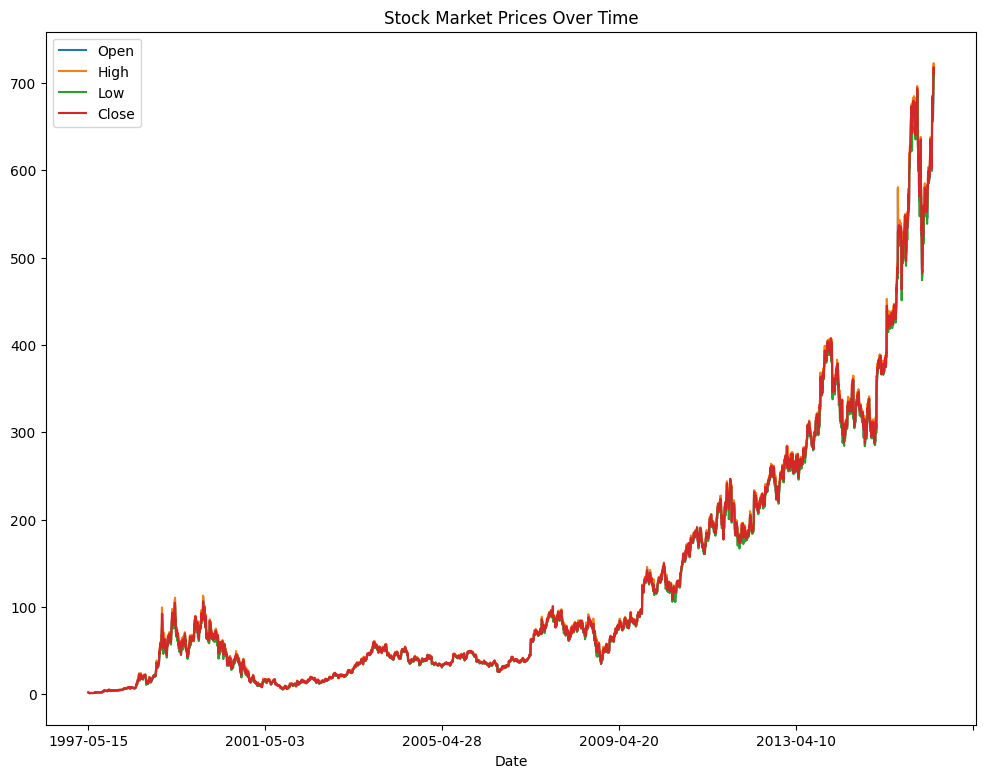

In [7]:
# plot the stock market prices over time
fig, ax = plt.subplots(figsize=(12, 9))
df_train.plot(x="Date", y=["Open", "High", "Low", "Close"], title="Stock Market Prices Over Time", ax=ax)
plt.show()

#### Exploratory analysis of test dataset

In [8]:
explore(df_test)

--- Exploratory Data Analysis ---
---------------------------------
Head of DataFrame:
          Date         Open         High          Low        Close  \
0  2018-05-15  1587.800049  1587.800049  1565.219971  1576.119995   
1  2018-05-16  1577.500000  1594.430054  1576.670044  1587.280029   
2  2018-05-17  1580.560059  1594.040039  1573.000000  1581.760010   
3  2018-05-18  1581.329956  1583.589966  1572.099976  1574.369995   
4  2018-05-21  1585.000000  1592.050049  1575.000000  1585.459961   

     Adj Close   Volume  
0  1576.119995  5077500  
1  1587.280029  2570600  
2  1581.760010  2147600  
3  1574.369995  2642600  
4  1585.459961  2925200  
---------------------------------
Shape of DataFrame:
 (504, 7)
---------------------------------
Columns in DataFrame:
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
---------------------------------
Data types of columns:
 Date          object
Open         float64
High         float64
Low         

In [9]:
df_test["Date"].describe()

count            504
unique           504
top       2020-05-14
freq               1
Name: Date, dtype: object

In [10]:
df_test["Date"].min(), df_test["Date"].max()

('2018-05-15', '2020-05-14')

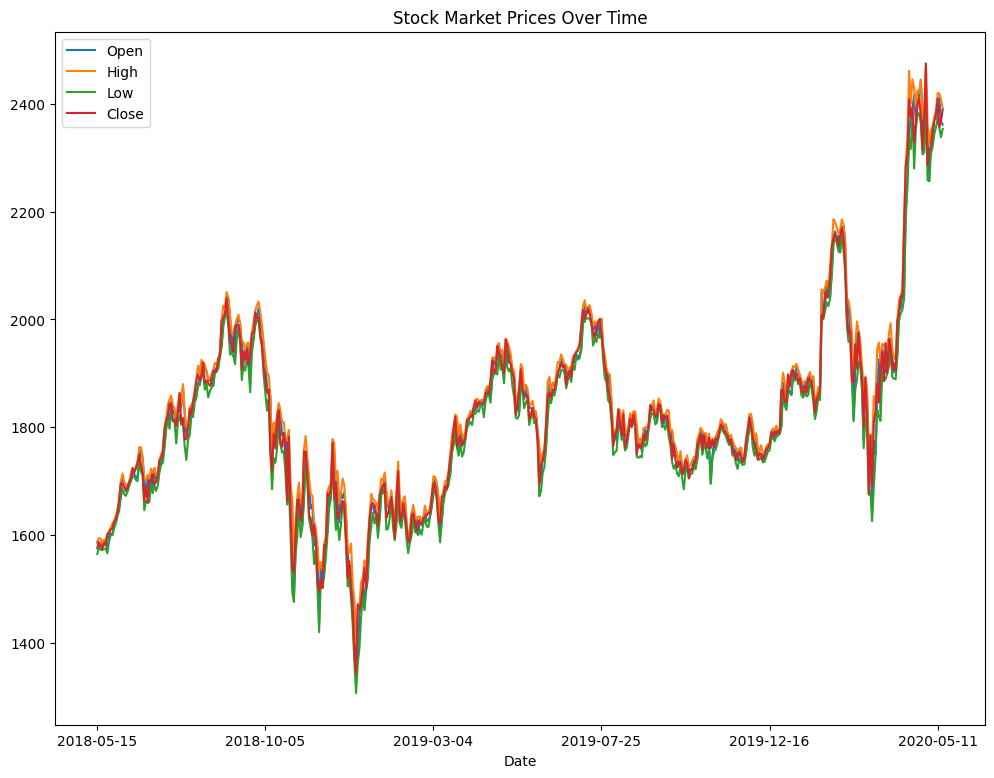

In [11]:
# plot the stock market prices over time
fig, ax = plt.subplots(figsize=(12, 9))
df_test.plot(x="Date", y=["Open", "High", "Low", "Close"], title="Stock Market Prices Over Time", ax=ax)
plt.show()

#### Exploratory analysis of validation dataset

In [12]:
explore(df_val)

--- Exploratory Data Analysis ---
---------------------------------
Head of DataFrame:
          Date        Open        High         Low       Close   Adj Close  \
0  2016-05-16  710.130005  713.250000  700.280029  710.659973  710.659973   
1  2016-05-17  709.900024  714.469971  693.909973  695.270020  695.270020   
2  2016-05-18  689.559998  702.539978  688.760010  697.450012  697.450012   
3  2016-05-19  691.880005  699.400024  689.559998  698.520020  698.520020   
4  2016-05-20  701.049988  707.239990  700.000000  702.799988  702.799988   

    Volume  
0  5432900  
1  5121400  
2  4283200  
3  3025600  
4  2916200  
---------------------------------
Shape of DataFrame:
 (503, 7)
---------------------------------
Columns in DataFrame:
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
---------------------------------
Data types of columns:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64


In [13]:
df_val["Date"].describe()

count            503
unique           503
top       2018-05-14
freq               1
Name: Date, dtype: object

In [14]:
df_val["Date"].min(), df_val["Date"].max()

('2016-05-16', '2018-05-14')

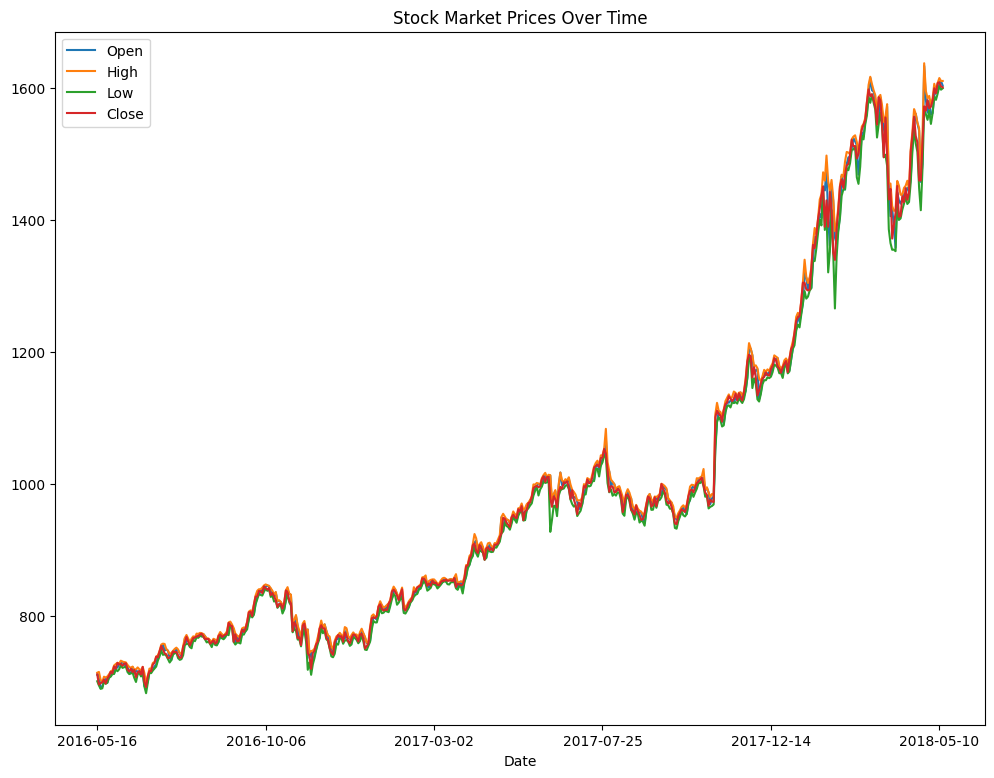

In [15]:
plt.rcParams["figure.figsize"] = (12, 9)
df_val.plot(x="Date", y=["Open", "High", "Low", "Close"], title="Stock Market Prices Over Time")
plt.show()

In [16]:
# infer target column - Is next day's closing price higher than next day's opening price?

# sort the data by date in ascending order
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train = df_train.sort_values("Date", ascending=True)

df_test["Date"] = pd.to_datetime(df_test["Date"])
df_test = df_test.sort_values("Date", ascending=True)

df_val["Date"] = pd.to_datetime(df_val["Date"])
df_val = df_val.sort_values("Date", ascending=True)

df_train["Target"] = np.where(df_train["Close"].shift(-1) > df_train["Open"].shift(-1), 1, 0)
df_test["Target"] = np.where(df_test["Close"].shift(-1) > df_test["Open"].shift(-1), 1, 0)
df_val["Target"] = np.where(df_val["Close"].shift(-1) > df_val["Open"].shift(-1), 1, 0)

In [17]:
df_train["Target"].value_counts()

Target
1    2392
0    2389
Name: count, dtype: int64

In [18]:
df_test["Target"].value_counts()

Target
1    255
0    249
Name: count, dtype: int64

In [19]:
df_val["Target"].value_counts()

Target
0    255
1    248
Name: count, dtype: int64

#### Feature engineering

In [20]:
# feature for tracking current direction of stock price (we want to track this quantitatively and not categorically)
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]

In [21]:
df_train["Rolling_3_Day"] = df_train["Today_Direction"].rolling(window=3, min_periods=1).mean()
df_test["Rolling_3_Day"] = df_test["Today_Direction"].rolling(window=3, min_periods=1).mean()
df_val["Rolling_3_Day"] = df_val["Today_Direction"].rolling(window=3, min_periods=1).mean()

df_train["Rolling_5_Day"] = df_train["Today_Direction"].rolling(window=5, min_periods=1).mean()
df_test["Rolling_5_Day"] = df_test["Today_Direction"].rolling(window=5, min_periods=1).mean()
df_val["Rolling_5_Day"] = df_val["Today_Direction"].rolling(window=5, min_periods=1).mean()

In [22]:
# feature for price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]

In [23]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Today_Direction,Rolling_3_Day,Rolling_5_Day,Price_Range
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,-0.479167,-0.479167,-0.479167,0.572917
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,-0.239583,-0.359375,-0.359375,0.270834
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,-0.052084,-0.256945,-0.256945,0.145833
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,-0.093750,-0.128472,-0.216146,0.114583
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,-0.208334,-0.118056,-0.214584,0.270833
...,...,...,...,...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1,5.799988,3.160014,2.350012,15.570007
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1,9.070007,10.923340,5.372009,11.049988
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1,7.440002,7.436666,5.198010,17.349976
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0,0.549988,5.686666,8.152002,10.940002


In [24]:
X_train = df_train.set_index("Date").drop(["Target"], axis=1)
y_train = df_train["Target"]

X_val = df_val.set_index("Date").drop(["Target"], axis=1)
y_val = df_val["Target"]

X_test = df_test.set_index("Date").drop(["Target"], axis=1)
y_test = df_test["Target"]

In [25]:
# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Train logistic model with different regularization strengths for l1, l2 and elasticnet

In [26]:
c_values = np.logspace(-3, 3, 100)

##### l1/Lasso Logistic Regression

In [27]:
auc_scores = []
for c in c_values:
    logistic_model = LogisticRegression(penalty="l1", solver="liblinear", C=c, max_iter=10000)
    logistic_model.fit(X_train_scaled, y_train)
    y_pred = logistic_model.predict(X_val_scaled)
    y_scores = logistic_model.predict_proba(X_val_scaled)[:, 1]
    roc_auc = roc_auc_score(y_val, y_scores)
    auc_scores.append({
        "auc_score": roc_auc,
        "c": c
    })
# get c value with highest auc score
best_c_l1 = max(auc_scores, key=lambda x: x["auc_score"])

In [28]:
print(f"Logistic model with l1 regularizaton and C={best_c_l1['c']} has the highest AUC score of {best_c_l1['auc_score']}")

Logistic model with l1 regularizaton and C=0.001 has the highest AUC score of 0.5


##### l2/Ridge Logistic Regression

In [29]:
auc_scores = []
for c in c_values:
    logistic_model = LogisticRegression(penalty="l2", solver="liblinear", C=c)
    logistic_model.fit(X_train_scaled, y_train)
    y_pred = logistic_model.predict(X_val_scaled)
    y_scores = logistic_model.predict_proba(X_val_scaled)[:, 1]
    roc_auc = roc_auc_score(y_val, y_scores)
    auc_scores.append({
        "auc_score": roc_auc,
        "c": c
    })
# get c value with highest auc score
best_c_l2 = max(auc_scores, key=lambda x: x["auc_score"])

In [30]:
print(f"Logistic model with l2 regularizaton and C={best_c_l2['c']} has the highest AUC score of {best_c_l2['auc_score']}")

Logistic model with l2 regularizaton and C=0.001 has the highest AUC score of 0.4891049968374447


##### Elastic Net Logistic Regression

In [31]:
auc_scores = []
for c in c_values:
    logistic_model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, C=c, max_iter=10000)
    logistic_model.fit(X_train_scaled, y_train)
    y_pred = logistic_model.predict(X_val_scaled)
    y_scores = logistic_model.predict_proba(X_val_scaled)[:, 1]
    roc_auc = roc_auc_score(y_val, y_scores)
    auc_scores.append({
        "auc_score": roc_auc,
        "c": c
    })
# get c value with highest auc score
best_c_elasticnet = max(auc_scores, key=lambda x: x["auc_score"])

In [32]:
print(f"Logistic model with elasticnet regularizaton and C={best_c_elasticnet['c']} has the highest AUC score of {best_c_elasticnet['auc_score']}")

Logistic model with elasticnet regularizaton and C=0.001 has the highest AUC score of 0.5


##### Best logistic regression model

In [33]:
# logistic_model = LogisticRegression(penalty="l1", solver="liblinear", C=0.09)
logistic_model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5,  C=best_c_elasticnet["c"])
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_val_scaled)
y_score = logistic_model.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_score)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.5


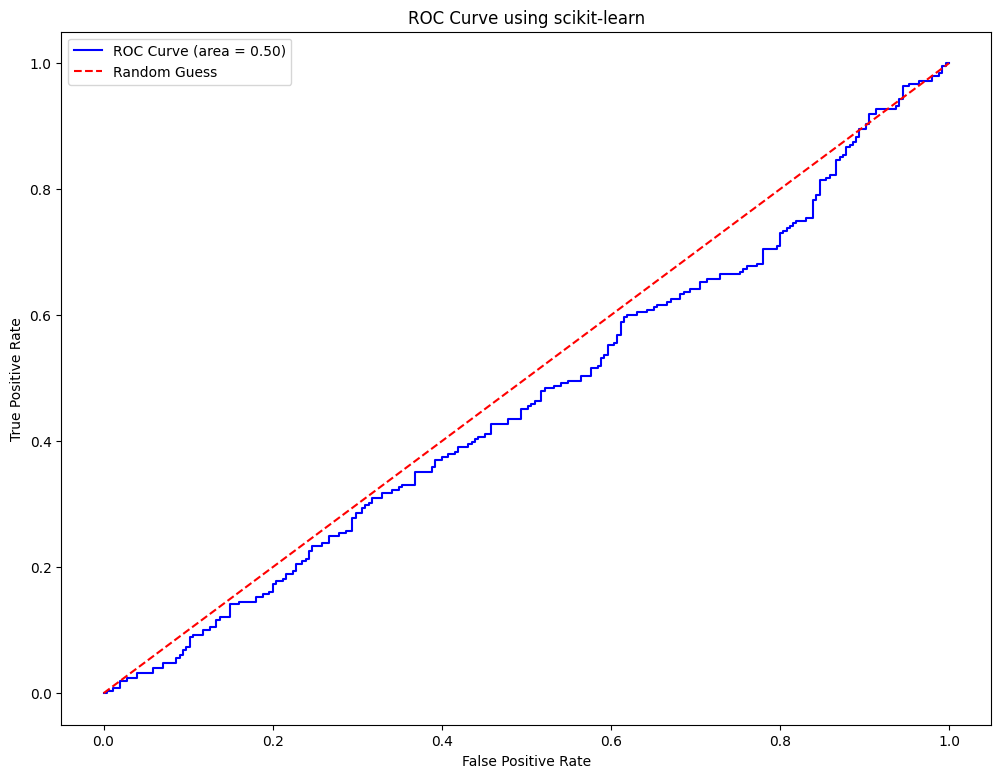

In [34]:
# computing ROC curve using scikit-learn's roc_curve function
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
plt.rcParams["figure.figsize"] = (12, 9)
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve using scikit-learn")
plt.legend()
plt.show()

##### Evaluation metrics for best logistic regression model

In [35]:
tp = np.sum((y_pred == 1) & (y_val == 1)) # true positive
tn = np.sum((y_pred == 0) & (y_val == 0)) # true negative
fp = np.sum((y_pred == 1) & (y_val == 0)) # false positive
fn = np.sum((y_pred == 0) & (y_val == 1)) # false negative

In [36]:
tp, tn, fp, fn

(np.int64(248), np.int64(0), np.int64(255), np.int64(0))

In [37]:
confusion_matrix(y_val, y_pred)

array([[  0, 255],
       [  0, 248]])

In [38]:
confusion_matrix(y_val, y_pred, normalize="true")

array([[0., 1.],
       [0., 1.]])

In [39]:
precision = tp / (tp + fp) # precision
recall = tp / (tp + fn) # recall
f1_score = (2*precision*recall)/(precision + recall) # f1 score

In [40]:
precision, recall, f1_score

(np.float64(0.49304174950298213),
 np.float64(1.0),
 np.float64(0.6604527296937417))

In [41]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       255
           1       0.49      1.00      0.66       248

    accuracy                           0.49       503
   macro avg       0.25      0.50      0.33       503
weighted avg       0.24      0.49      0.33       503



c:\Users\meeta\OneDrive\Documents\py_projects\stock_direct\.stock_direct\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\meeta\OneDrive\Documents\py_projects\stock_direct\.stock_direct\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\meeta\OneDrive\Documents\py_projects\stock_direct\.stock_direct\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [42]:
recall_0 = np.sum((y_pred == 0) & (y_val == 0)) / np.sum(y_val == 0) # recall for class 0
precision_0 = np.sum((y_pred == 0) & (y_val == 0)) / np.sum(y_pred == 0) # precision for class 0
f1_score = (2*precision_0*recall_0)/(precision_0 + recall_0) # f1 score for class 0

recall_0, precision_0, f1_score

C:\Users\meeta\AppData\Local\Temp\ipykernel_18796\3071265615.py:2: RuntimeWarning: invalid value encountered in scalar divide
  precision_0 = np.sum((y_pred == 0) & (y_val == 0)) / np.sum(y_pred == 0) # precision for class 0


(np.float64(0.0), np.float64(nan), np.float64(nan))

In [43]:
recall_1 = np.sum((y_pred == 1) & (y_val == 1)) / np.sum(y_val == 1) # recall for class 1
precision_1 = np.sum((y_pred == 1) & (y_val == 1)) / np.sum(y_pred == 1) # precision for class 1
f1_score = (2*precision_1*recall_1)/(precision_1 + recall_1) # f1 score for class 1

recall_1, precision_1, f1_score

(np.float64(1.0),
 np.float64(0.49304174950298213),
 np.float64(0.6604527296937417))

In [44]:
(tp + tn) / (tp + tn + fp + fn) # accuracy

np.float64(0.49304174950298213)